In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/Program_2_Dataset.csv")

In [ ]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [ ]:
df.shape

(506, 14)

In [ ]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

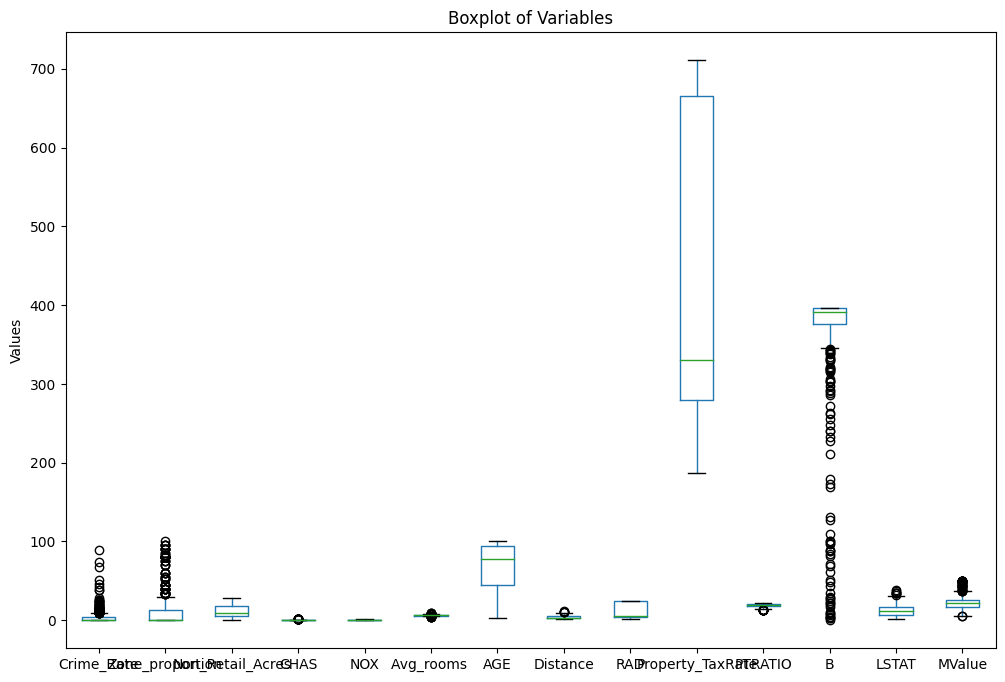

In [ ]:
plt.figure(figsize=(12, 8))
df.boxplot(column=list(df.columns), grid=False)
plt.title('Boxplot of Variables')
plt.ylabel('Values')
plt.show()

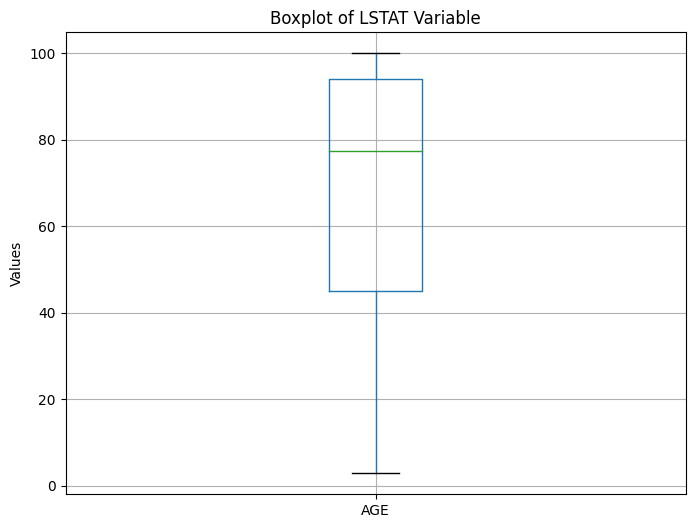

In [ ]:
plt.figure(figsize=(8, 6))
df.boxplot(column=['AGE'])
plt.title('Boxplot of LSTAT Variable')
plt.ylabel('Values')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
X = df.drop('MValue', axis=1)
y = df['MValue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Printing the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 20.259342944955
Coefficients: [-1.12766013e-01  3.74631992e-02  3.22219699e-02  1.93444095e+00
 -1.76337882e+01  3.92197587e+00 -2.49147983e-03 -1.57540275e+00
  3.06232262e-01 -1.31759199e-02 -9.89726184e-01  1.03390007e-02
 -5.31237978e-01]
Intercept: 37.09747556859814


In [ ]:
from sklearn.metrics import r2_score


In [ ]:

from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("The R-squared score for the linear regression model is {}".format(r2))

The R-squared score for the linear regression model is 0.7395724246395499


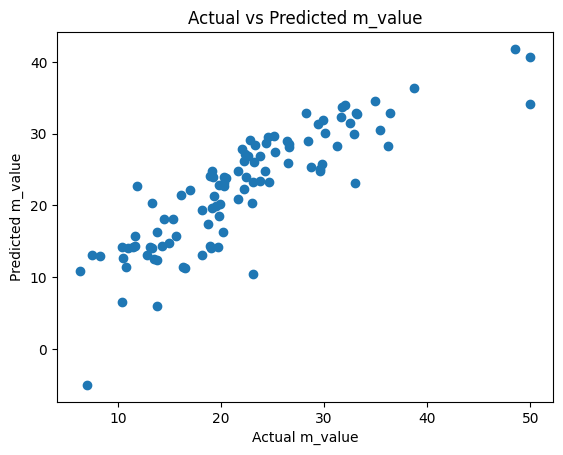

In [ ]:
# Visualizing the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual m_value')
plt.ylabel('Predicted m_value')
plt.title('Actual vs Predicted m_value')
plt.show()

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso

In [ ]:
ridgeReg = Ridge(alpha=0.1)

ridgeReg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))
r2_ridge = r2_score(y_test, y_pred)

print("The R-squared score for Ridge regression is {}".format(r2_ridge))



Ridge Model............................................

The train score for ridge model is 0.7387894347980106
The test score for ridge model is 0.7395582378033474
The R-squared score for Ridge regression is 0.7395724246395499


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=50)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)

print("The R-squared score for Lasso regression is {}".format(r2_lasso))


The R-squared score for Lasso regression is 0.2880490925869652
